In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import time

np.random.seed(42)

In [13]:
def sigmoid(x):
    value = 1/(1+np.exp(-x))
    return value

def sigmoid_deravative(x):
    value = x*(1-x)
    return value

In [14]:
class XORNet:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.uniform(size=(input_size, hidden_size))
        self.b1 = np.random.uniform(size=(1, hidden_size))
        
        self.W2 = np.random.uniform(size=(hidden_size, output_size))
        self.b2 = np.random.uniform(size=(1, output_size))
        
    def forward(self, X):
        # --- Layer 1 ---
        self.h1 = np.dot(X, self.W1) + self.b1
        
        self.a1 = sigmoid(self.h1)
        
        # --- Layer 2 ----
        
        self.h2 = np.dot(self.a1, self.W2) + self.b2 
        self.y_hat = sigmoid(self.h2)
        
        return self.y_hat
    
    def backward(self,X, y, lr ):
        
        delta_out = (self.y_hat-y) * sigmoid_deravative(self.y_hat)
        
        # dc/da1
        error_hidden = delta_out.dot(self.W2.T) 
        
        
        delta_hidden = error_hidden * sigmoid_deravative(self.a1)
        
        dw2 = self.a1.T.dot(delta_out) 
        
        dw1 = X.T.dot(delta_hidden)
        
        # Update the weights
        
        self.W2 = self.W2 - lr*dw2
        self.W1 = self.W1 - lr*dw1
        
        # Update the bias
        self.b2 = self.b2 - lr*np.sum(delta_out, axis=0, keepdims=True)
        self.b1 = self.b1 - lr*np.sum(delta_hidden, axis=0, keepdims=True)
        
 
        
         

## Training Loop

Starting  Training....
Epoch 0: Loss 0.3247
Epoch 1000: Loss 0.2406
Epoch 2000: Loss 0.1960
Epoch 3000: Loss 0.1207
Epoch 4000: Loss 0.0305
Epoch 5000: Loss 0.0125
Epoch 6000: Loss 0.0074
Epoch 7000: Loss 0.0051
Epoch 8000: Loss 0.0038
Epoch 9000: Loss 0.0031
Epoch 10000: Loss 0.0025
Epoch 11000: Loss 0.0022
Epoch 12000: Loss 0.0019
Epoch 13000: Loss 0.0017
Epoch 14000: Loss 0.0015
Epoch 15000: Loss 0.0013
Epoch 16000: Loss 0.0012
Epoch 17000: Loss 0.0011
Epoch 18000: Loss 0.0010
Epoch 19000: Loss 0.0010
Epoch 20000: Loss 0.0009
Epoch 21000: Loss 0.0008
Epoch 22000: Loss 0.0008
Epoch 23000: Loss 0.0008
Epoch 24000: Loss 0.0007
Epoch 25000: Loss 0.0007
Epoch 26000: Loss 0.0006
Epoch 27000: Loss 0.0006
Epoch 28000: Loss 0.0006
Epoch 29000: Loss 0.0006
Epoch 30000: Loss 0.0005
Epoch 31000: Loss 0.0005
Epoch 32000: Loss 0.0005
Epoch 33000: Loss 0.0005
Epoch 34000: Loss 0.0005
Epoch 35000: Loss 0.0004
Epoch 36000: Loss 0.0004
Epoch 37000: Loss 0.0004
Epoch 38000: Loss 0.0004
Epoch 39000: Lo

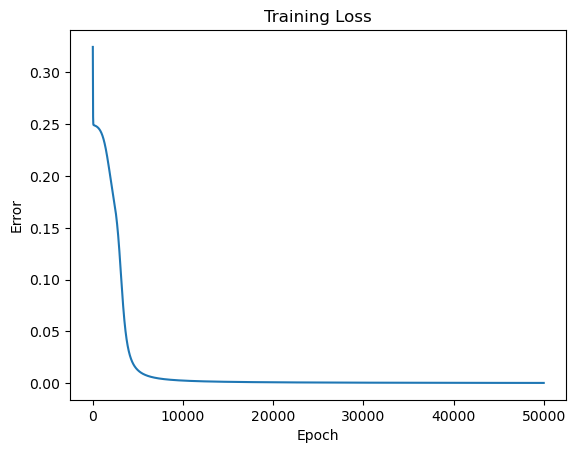

In [15]:
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [1], [1], [0]])

nn = XORNet(input_size=2, hidden_size=2, output_size=1)

loss_history = []
epochs = 50000
learning_rate = 0.1

start_time = time.time()


print("Starting  Training....")

for i in range(epochs):
    # Forward Pass
    nn.forward(X)
    
    # Backward Pass
    
    nn.backward(X, y, lr=learning_rate)
    
    # Calculate the loss
    loss = np.mean(np.square(y-nn.y_hat))
    loss_history.append(loss)
    
    if i % 1000 == 0:
        print(f"Epoch {i}: Loss {loss:.4f}")
        
end_time = time.time()
print(f"\nTraining Complete in {end_time - start_time:.2f} seconds.")
        

print(nn.forward(X))

# Plot Loss Curve
plt.plot(loss_history)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.show()
      
    
    


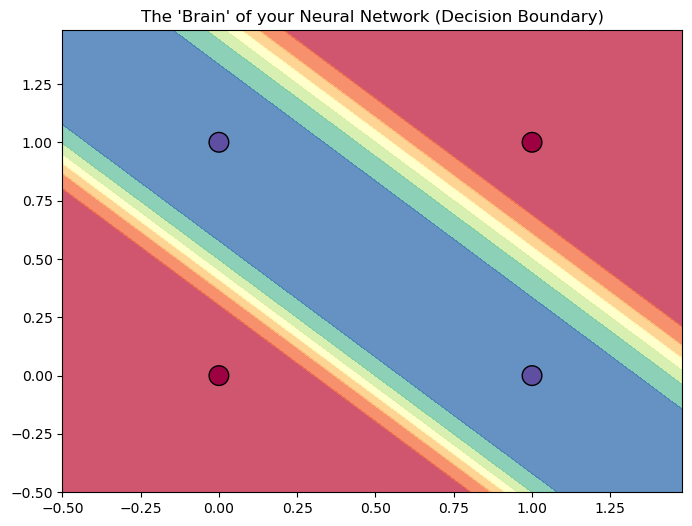

In [16]:
# Generate a grid of points to visualize the decision boundary
h = 0.02
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict on the whole grid
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = nn.forward(grid_points)
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), s=200, cmap=plt.cm.Spectral, edgecolors='k')
plt.title("The 'Brain' of your Neural Network (Decision Boundary)")
plt.show()